In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('../Dataset/titanic_toy.csv')
df



Age     Fare  Family  Survived
0    22.0   7.2500       1         0
1    38.0  71.2833       1         1
2    26.0   7.9250       0         1
3    35.0  53.1000       1         1
4    35.0   8.0500       0         0
..    ...      ...     ...       ...
886  27.0  13.0000       0         0
887  19.0  30.0000       0         1
888   NaN  23.4500       3         0
889  26.0      NaN       0         1
890  32.0   7.7500       0         0

[891 rows x 4 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [14]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_fare)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)

In [15]:
X_train.sample(5)

Age     Fare  Family  Age_median   Age_mean  Fare_median  Fare_mean
407   3.0  18.7500       2         3.0   3.000000      18.7500  18.750000
562  28.0      NaN       0        28.0  28.000000      14.4000  32.517788
858  24.0  19.2583       3        24.0  24.000000      19.2583  19.258300
732   NaN   0.0000       0        28.0  29.498846       0.0000   0.000000
813   6.0  31.2750       6         6.0   6.000000      31.2750  31.275000

In [16]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


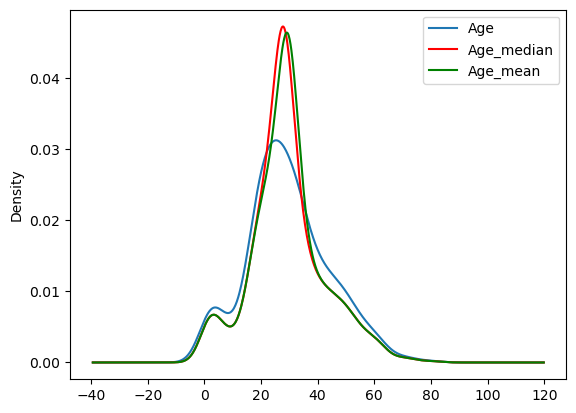

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

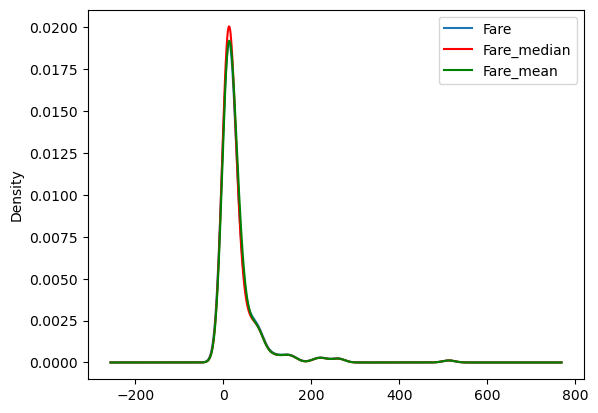

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
X_train.cov()

Age         Fare     Family  Age_median    Age_mean  \
Age          210.251707    75.481375  -6.993325  210.251707  210.251707   
Fare          75.481375  2761.031435  18.599163   63.938058   60.224654   
Family        -6.993325    18.599163   2.830892   -5.587710   -5.616299   
Age_median   210.251707    63.938058  -5.587710  169.207310  168.851934   
Age_mean     210.251707    60.224654  -5.616299  168.851934  168.851934   
Fare_median   70.082085  2761.031435  17.672035   59.728510   56.282518   
Fare_mean     71.193767  2761.031435  17.657433   60.700688   57.175304   

             Fare_median    Fare_mean  
Age            70.082085    71.193767  
Fare         2761.031435  2761.031435  
Family         17.672035    17.657433  
Age_median     59.728510    60.700688  
Age_mean       56.282518    57.175304  
Fare_median  2637.012482  2621.232375  
Fare_mean    2621.232375  2621.232375

<Axes: >

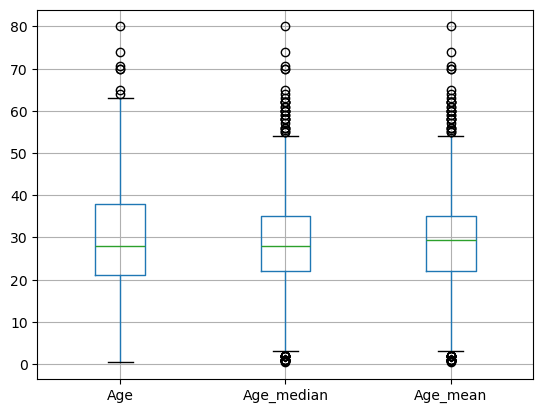

In [20]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

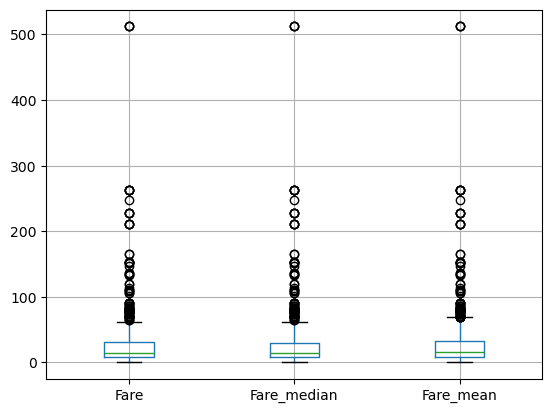

In [21]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Sklearn

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:

# Here we'll load the dataset and take a look at it.
# Then we'll split it into features and labels.
# Then we'll create a ColumnTransformer that will replace the missing values with the mean of the column.
# Finally, we'll create a pipeline that will do all of the above.
imputer1 = SimpleImputer(strategy='median')

imputer2 = SimpleImputer(strategy='mean')

In [26]:
# In this example, we are going to use the Titanic dataset to demonstrate how to
# use the mean and median imputation methods. We will use the Age and Fare columns
# since they are numerical and contain missing values.
trf = ColumnTransformer([


    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [27]:
trf.fit_transform(X_train)

# The code at this point is set to apply the transformations defined by the ColumnTransformer `trf`
# to the training dataset `X_train`. This will impute missing values in the 'Age' column using the median
# and in the 'Fare' column using the mean.

# Transform the training data
# X_train_transformed = trf.transform(X_train)

# # Optionally, you can check the result by converting it back into a DataFrame
# import pandas as pd

# X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=['Age', 'Fare', 'Family'])
# print(X_train_transformed_df.head())



array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [28]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [29]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [30]:
X_train =trf.transform(X_train)
X_test = trf.transform(X_test)

In [31]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])